### DFA - Incrementos

### Conditional PDF
***

Em que consiste essa figura?

Um meio de investigar a não-estacionariedade dos grupos. Como isso se dá? A segmentação oferece um meio de investigar o comportamento da variância. Para uma série mais próxima da estacionariedade, deveríamos ter pouca variabilidade da variância, independentemente dos tamanhos dos segmentos.

Há diferenças nas aglomerações dos dados entre os grupos? O que pode significar essa diferença?

O que diz a presença de uma tendência dos valores (e, da mesma forma, a ausência de tendência)?





****
Teste. Considerando todos os segmentos de cada individuo, aglomerando os dados por grupo, para evitar distorções e testar o algoritmo, comparando-o com o resultado do paper.

Obs: Os pontos para as séries de intervalos entre batimentos não se alinham tão bem. Por quê?

Duv: Como fazer para que apareça uma reta aproximando os pontos com eixos em escala logarítmica? Qual curva deve ser aproximada?

<IPython.core.display.Javascript object>


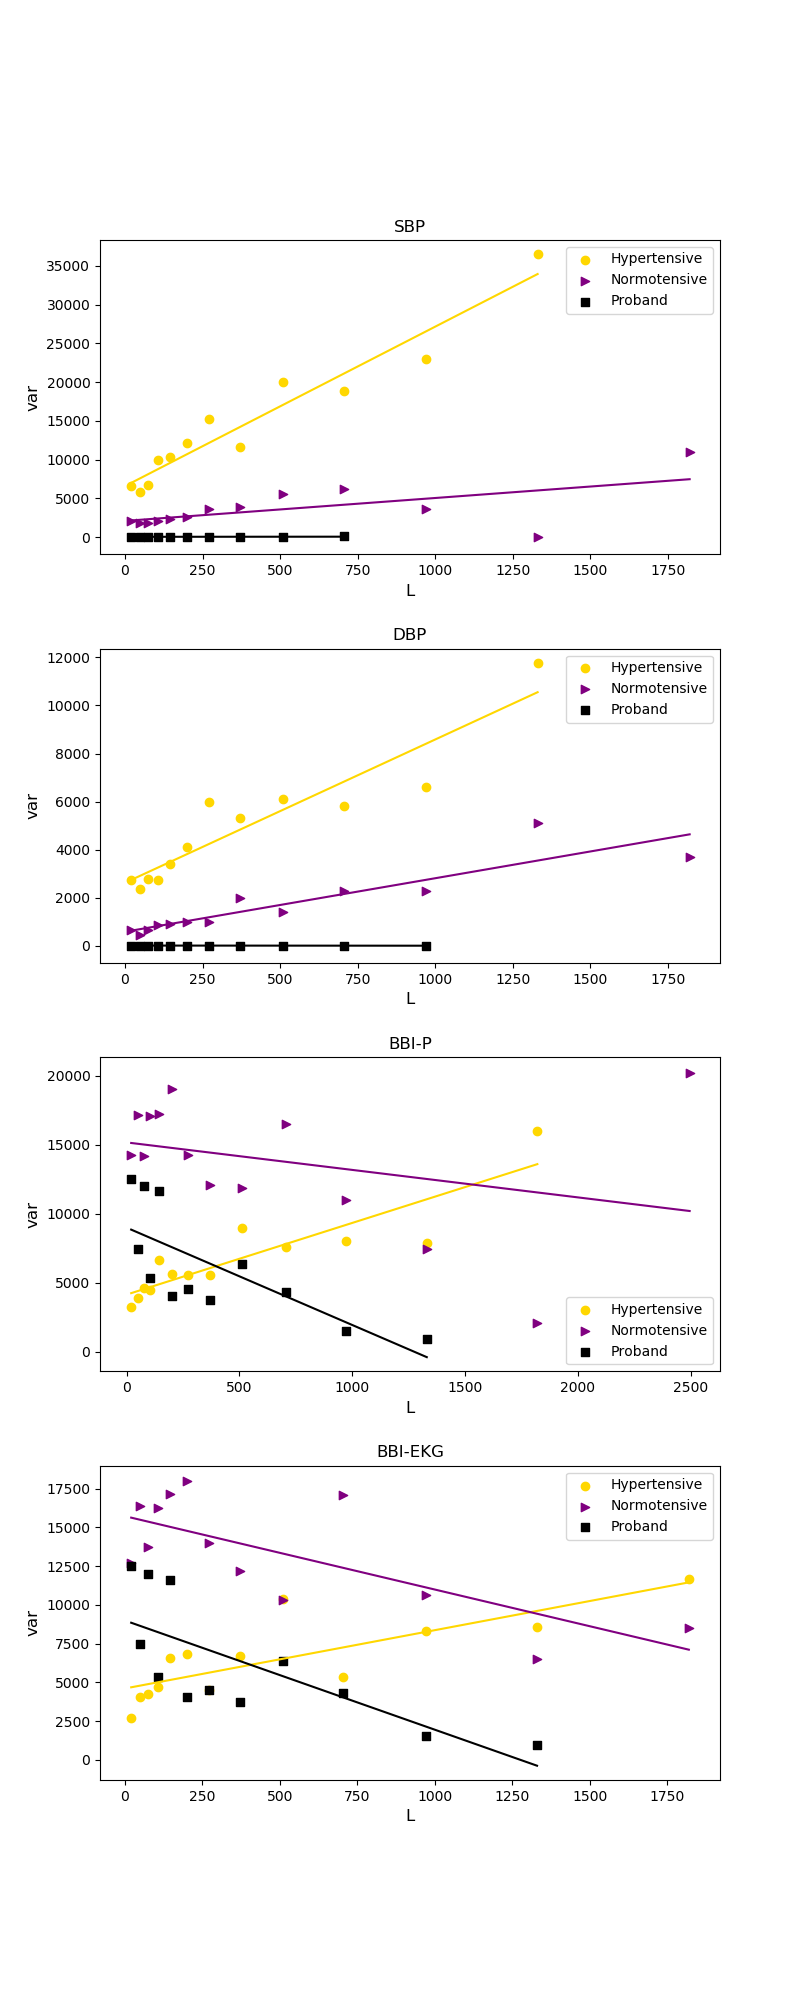

In [358]:
# Definição da reta para aproximação.
def line(x, a, b):
    return a*x + b

# Gera a figura para o plot
fig, axs = plt.subplots(nrows = 4, ncols = 1) # 4 séries, 3 grupos

# Configura o tamanho da figura e distâncias entre os eixos
fig.set_size_inches(8, 20)
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)

# Configura o tamanho das fontes dos títulos
for i in range(4):
    axs[i].title.set_fontsize(14)
    axs[i].xaxis.label.set_fontsize(12)
    axs[i].yaxis.label.set_fontsize(12)

# Define itens de formatação
colors    = ["gold", "purple", "black"]
markers   = ["o", ">", "s"]
labels = ["Hypertensive", "Normotensive", "Proband"]
series_labels = ["SBP", "DBP", "BBI-P", "BBI-EKG"]


for s in range(4):
    for g in range(3):
        # Cria uma estrutura contendo tamanho, duração e variância de todos os segmentos, de todos 
        # os individuos de um grupo 'g'
        df = pd.DataFrame()
        for i in range(len(seg_res[g])):
            df = pd.concat([df, seg_res[g][i][s].dropna()[["size", "Dt", "variance"]]])
                
        # Gera os pontos do eixo x, espaçados igualmente em escala logarítmica.
        # O número de pontos definido contempla todo o intervalo de pontos do tamanho
        interval_log = np.zeros(16); lim = np.zeros(16);
        for i in range(1, 16):
            interval_log[i] = int(np.power(1.37, i+4))
            lim[i] = 10*(interval_log[i]+interval_log[i-1])/2


        dif = np.empty(0)
        l   = np.empty(0)
        var = np.empty(0)

        for k in range(1, 15):
            # Seleciona, na estrutura, os segmentos dentro de uma faixa especificada
            temp = df.where((df["size"] < lim[k+1]) & (df["size"] >= lim[k])).dropna()
            # Se há pelo menos um segmento, calcula a média da variância dos segmentos 
            # e os pontos correspondentes do eixo x
            if len(temp) > 0:
                dif = np.append(dif, (lim[k+1] - lim[k])/2)
                l   = np.append(l, lim[k])
                var = np.append(var, temp["variance"].values.mean())
        
        # Aproxima uma reta para os pontos
        par, pcov = curve_fit(line, l, var)
        axs[s].scatter(l, var, color = colors[g], marker = markers[g], label = labels[g])
        axs[s].plot(l, line(l, *par), color = colors[g])
        
    axs[s].set_title(series_labels[s])
    axs[s].set_xlabel("L")
    axs[s].set_ylabel("var")
    axs[s].legend(fontsize = 10, markerscale = 1)
    #axs[s].set_yscale('log')
    #axs[s].set_xscale('log')

***

Plot agrupando os dados por fases do sono.

***

Há alguns problemas.
    1. O volume de segmentos de cada fase não é igual em cada grupo. A fase N4, por exemplo, aparece raramente nos indivíduos do grupo hipertenso. Portanto, poucos pontos aparecem na figura. A fase N2 aparece frequentemente em todos os grupos, portanto vários pontos aparecem na figura, e dá para ver alguma tendência para esses valores, mas...
    2. ... no geral, todos os pontos estão dispersos demais. Aproximei retas para os dados plotados nos eixos normais (pois preciso verificar qual curva aproximo para os eixos em escala logarítmica), mas isso é pouco significativo dada a dispersão dos pontos, e não é possível encontrar padrão algum. Em escala logarítmica os pontos estão mais organizados (pode-se compará-los verticalmente), mas também não parece haver padrão algum.
    3. A aglomeração de valores em um dos cantos do gráfico reafirma a similaridade das fases em relação aos segmentos de tamanhos menores. Há a interseção de faixas de valores e proximidade das curvas de distribuição empírica. Aqui, há a similaridade das variâncias. As discrepâncias aparecem somente em segmentos de tamanhos maiores. O fato de haver discrepância denota que a fase é uma influência (não depende apenas do tamanho do segmento).
    
Posso abandonar alguma possibilidade, dado esse resultado?

Talvez classificar os segmentos e buscar diferenças não seja o melhor jeito de investigar.

<IPython.core.display.Javascript object>


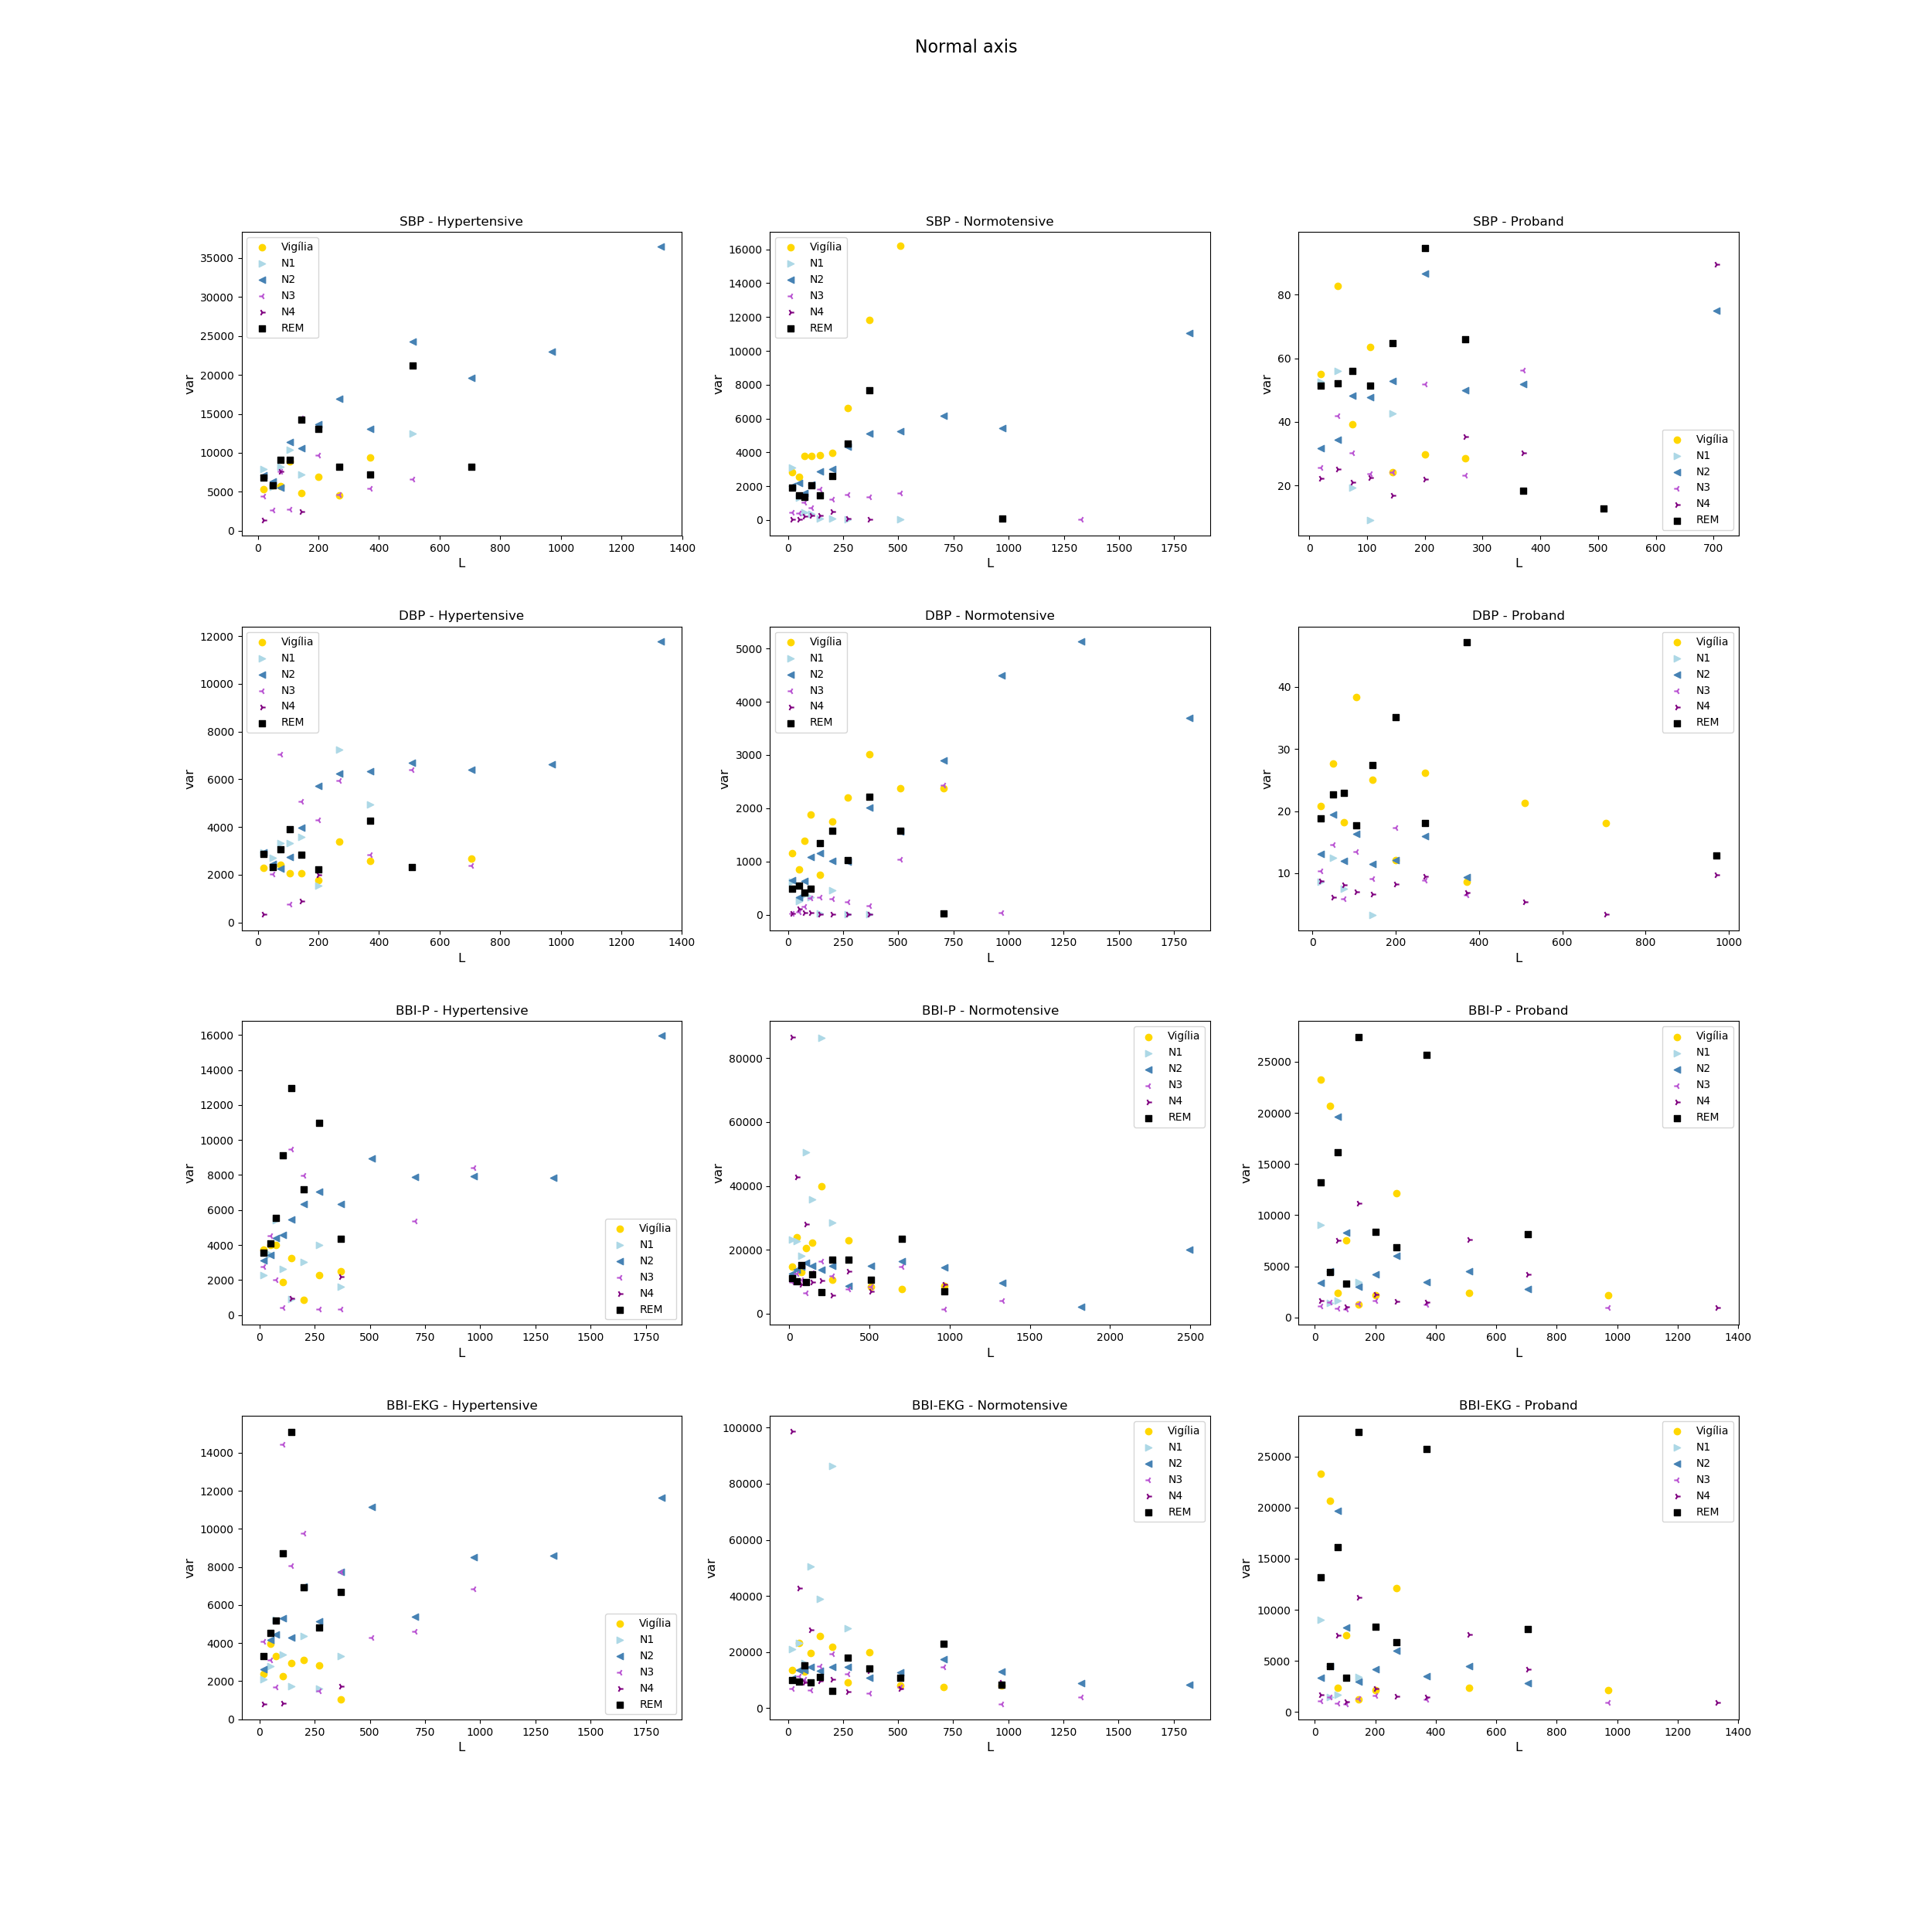

<IPython.core.display.Javascript object>


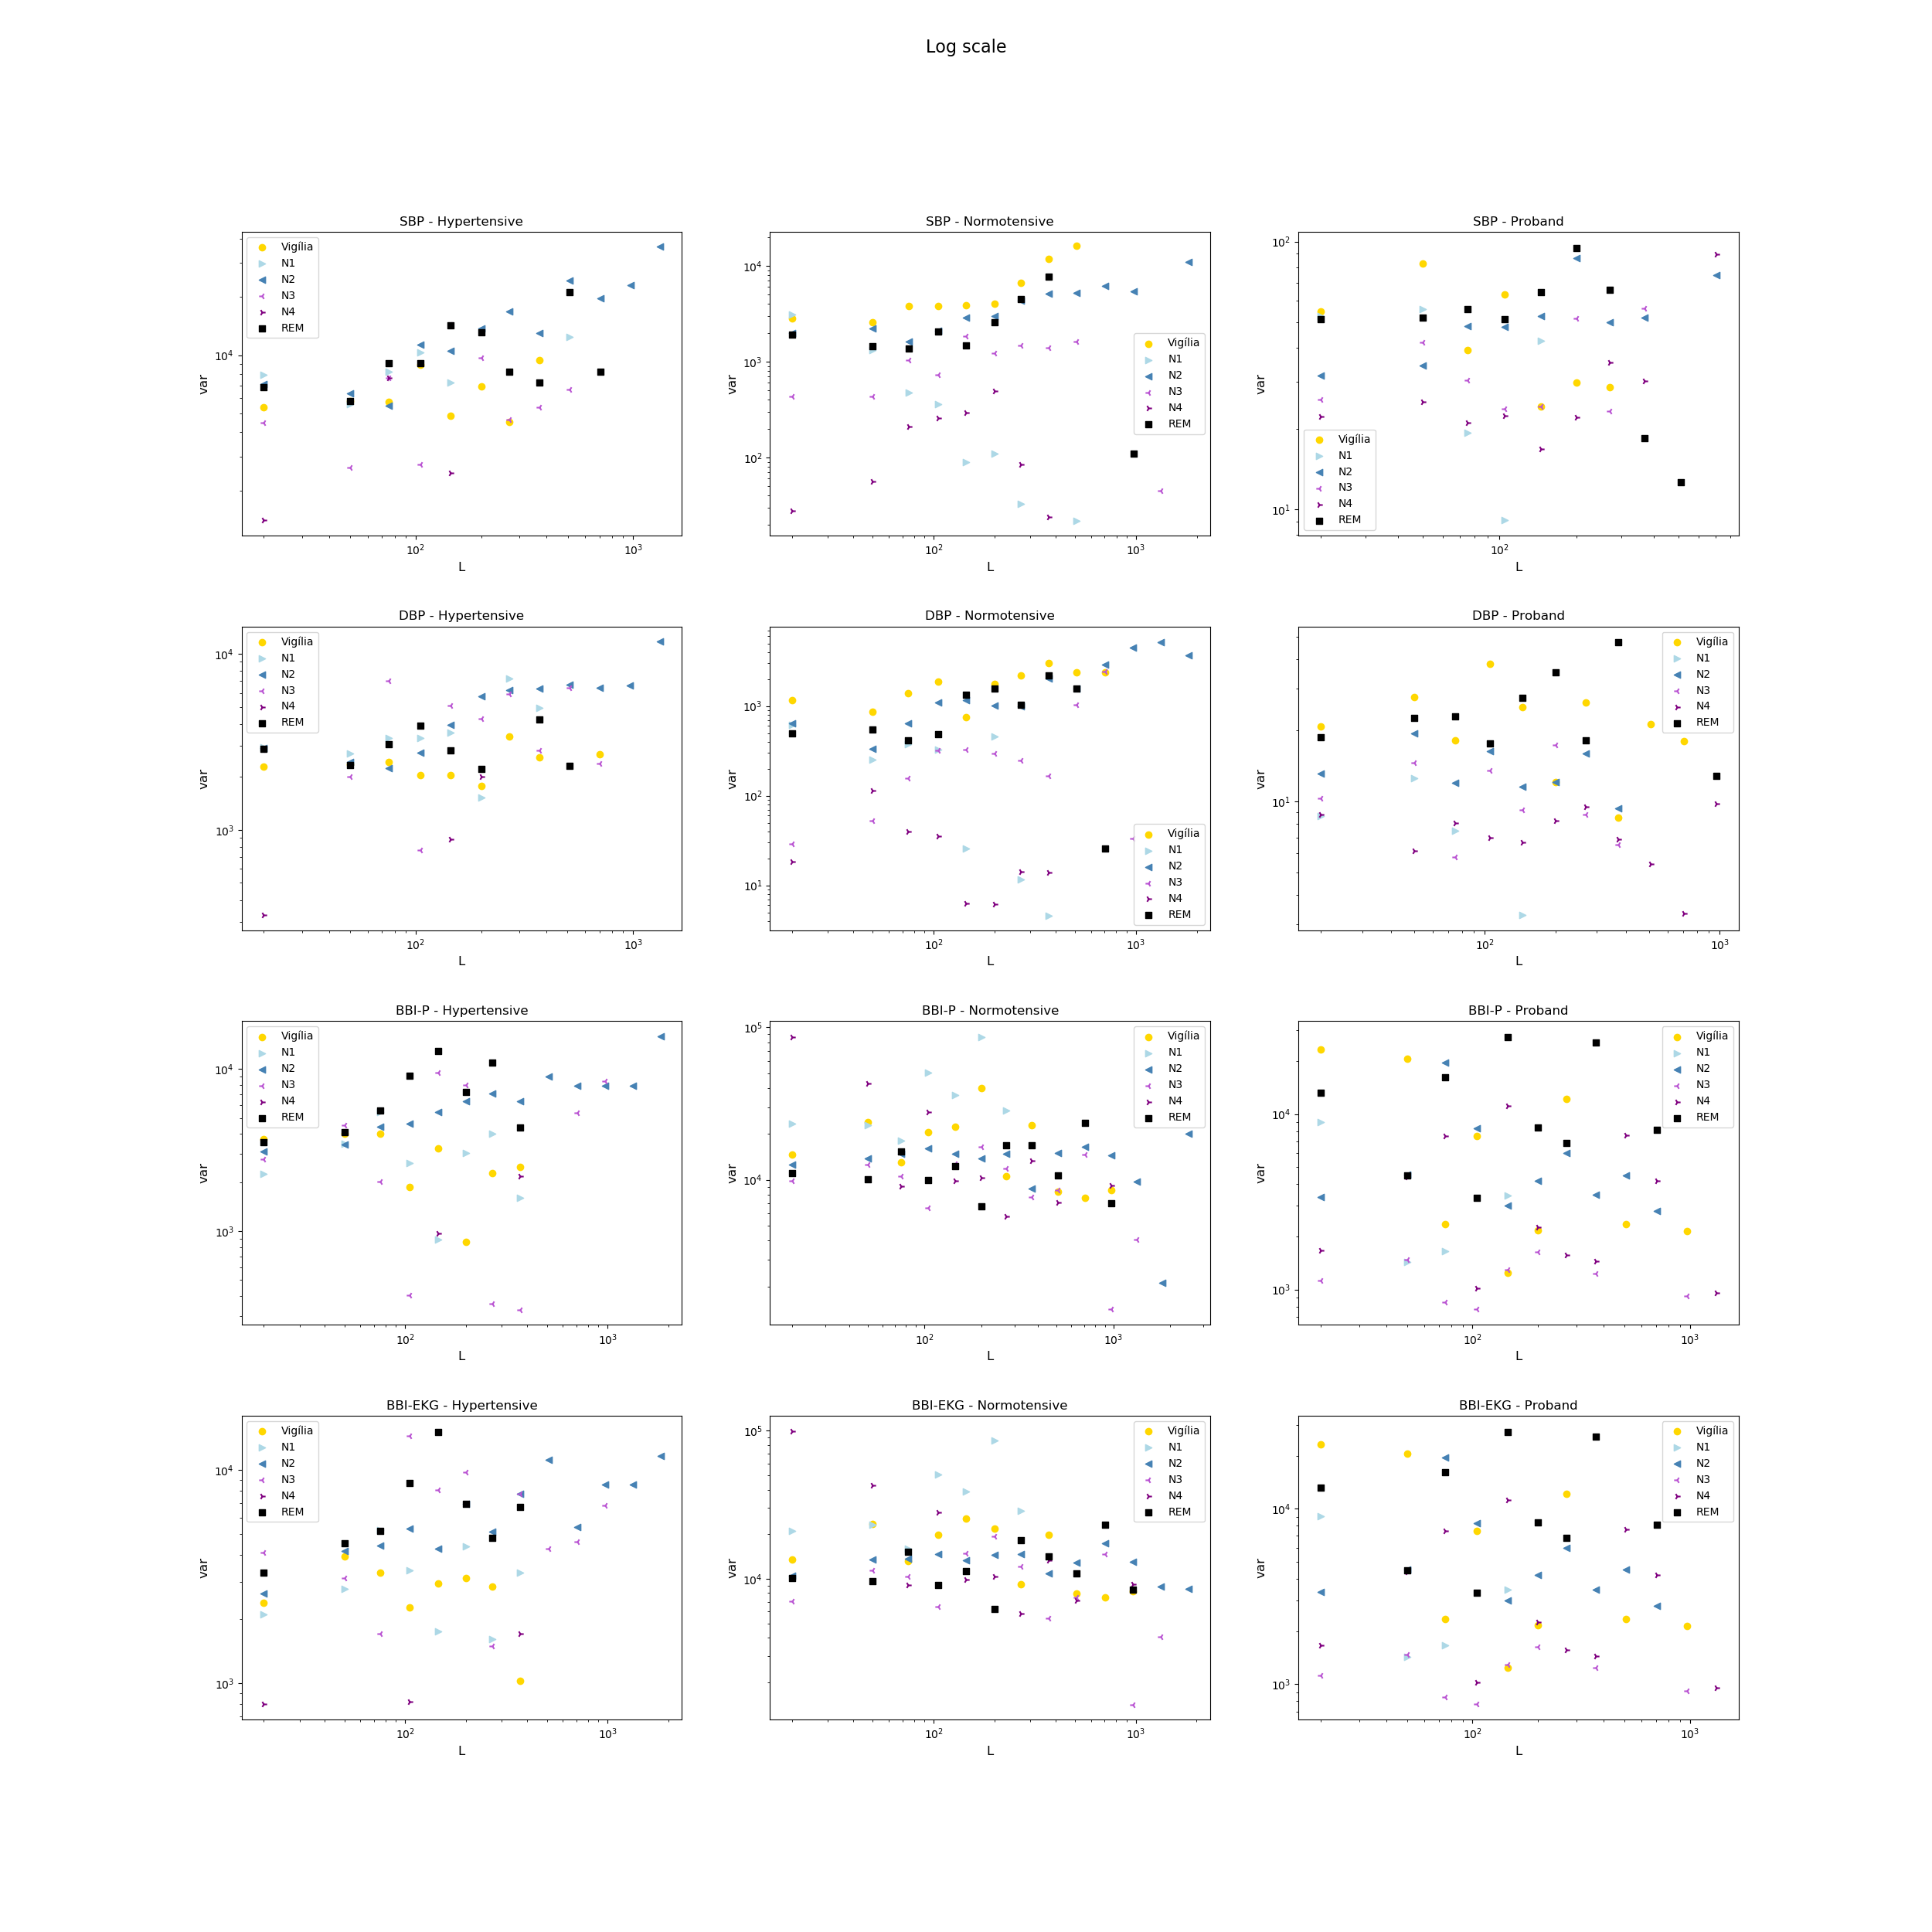

In [4]:
# Gera a figura para o plot
fig_norm, axs_norm = plt.subplots(nrows = 4, ncols = 3) # 4 séries, 3 grupos
fig_log, axs_log = plt.subplots(nrows = 4, ncols = 3) # 4 séries, 3 grupos

# Configura o tamanho da figura e distâncias entre os eixos
for fig in [fig_norm, fig_log]:
    fig.set_size_inches(25, 25)
    fig.subplots_adjust(hspace = 0.3, wspace = 0.2)
    
# Títulos das figuras
fig_norm.suptitle("Normal axis", fontsize = 16)
fig_log.suptitle("Log scale", fontsize = 16)

# Configura o tamanho das fontes dos títulos
for axs in [axs_norm, axs_log]:
    for i in range(4):
        for j in range(3):
            axs[i][j].title.set_fontsize(14)
            axs[i][j].xaxis.label.set_fontsize(12)
            axs[i][j].yaxis.label.set_fontsize(12)

# Define itens de formatação
colors    = ["gold", "lightblue", "steelblue", "mediumorchid", "purple", "black"]
markers   = ["o", ">", "<", "3", "4", "s"]
labels = ["Vigília", "N1", "N2", "N3", "N4", "REM"]
g_labels = ["Hypertensive", "Normotensive", "Proband"]
s_labels = ["SBP", "DBP", "BBI-P", "BBI-EKG"]

for f in range(6): # Fases
    
    for s in range(4): # Séries
        for g in range(3): # Grupos
            # Guarda em uma estrutura os dados de tamanho, duração e variância dos segmentos de uma série 's',
            # classificados por uma fase 'f', de todos os indivíduos de um grupo 'g'.
            df = pd.DataFrame()
            for i in range(len(seg_res[g])):
                df = pd.concat([df, seg_res[g][i][s].where(seg_res[g][i][s]["SleepStage"] == f).dropna()[["size", "Dt", "variance"]]])
                
            # Gera os pontos do eixo x, espaçados igualmente em escala logarítmica.
            # O número de pontos definido contempla todo o intervalo de pontos do tamanho 
            interval_log = np.zeros(16); lim = np.zeros(16);
            for i in range(1, 16):
                interval_log[i] = int(np.power(1.37, i+4))
                lim[i] = 10*(interval_log[i]+interval_log[i-1])/2


            dif = np.empty(0) # era para ser o ponto médio?
            l   = np.empty(0) # vetor para guardar os pontos extremos dos bins
            var = np.empty(0) # vetor para guardar as variâncias

            for k in range(1, 15):
                # Seleciona, na estrutura, os segmentos dentro de uma faixa especificada
                temp = df.where((df["size"] < lim[k+1]) & (df["size"] >= lim[k])).dropna()
                # Se há pelo menos um segmento, calcula a média da variância dos segmentos 
                # e os pontos correspondentes do eixo x
                if len(temp) > 0:
                    
                    dif = np.append(dif, (lim[k+1] - lim[k])/2)
                    l   = np.append(l, lim[k])
                    var = np.append(var, temp["variance"].values.mean())
                
            # Plota o scatter para os dados nos eixos em escala logarítmica
            axs_log[s][g].scatter(l, var, color = colors[f], marker = markers[f], label = labels[f])
            # Aproxima uma reta para os dados.
            #par, pcov = curve_fit(line, l, var)
            # Plota o scatter para os dados nos eixos normais.
            axs_norm[s][g].scatter(l, var, color = colors[f], marker = markers[f], label = labels[f])
            # Plota as curvas aproximadas nos eixos normais.
            #axs_norm[s][g].plot(l, line(l, *par), color = colors[f])
            
            # Modifica os eixos para escala logaritmica
            axs_log[s][g].set_yscale('log')
            axs_log[s][g].set_xscale('log')
            
            # Formatação e legendas dos eixos
            for axs in [axs_log, axs_norm]:
                axs[s][g].legend(fontsize = 10, markerscale = 1)
                axs[s][g].set_title(s_labels[s]+" - "+g_labels[g])
                axs[s][g].set_xlabel("L")
                axs[s][g].set_ylabel("var")
                

fig_norm.savefig("Plots/var_L_normal.png")
fig_log.savefig("Plots/var_L_escalalog.png")